<a href="https://colab.research.google.com/github/wonseokb/Genat4_Study/blob/main/PSD_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea list
1. take data from google drive, so it can use a lot of data files easily
2. regulate the horizontal line, so it can the full right area  
3. take FWHM and rising time, fall time. 10% point, 20% point ect. for other features.

In [39]:
!pip install tqdm
from tqdm import tqdm
import time

import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt

# Mount the Google Drive to access files
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Read the organized data(You can starts from here)

In [40]:
for i in tqdm(range(10)):
  # Load the array from the .npy file
  C3Sr90_x = np.load('/content/drive/My Drive/autoPSD.Sr90/C3Sr90_x.npy')
  C3Sr90_y = np.load('/content/drive/My Drive/autoPSD.Sr90/C3Sr90_y.npy')

  # Multiply each element of C3Sr90_y with 10^9
  C3Sr90_x *= 1e9
  C3Sr90_y *= 1e3

  time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Sr90_x.shape)
print(C3Sr90_y.shape)

100%|██████████| 10/10 [00:19<00:00,  2.00s/it]

(21801, 2122)
(21801, 2122)


In [ ]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    C3Cs137_x = np.load('/content/drive/My Drive/autoPSD.Cs137/C3Cs137_x.npy')
    C3Cs137_y = np.load('/content/drive/My Drive/autoPSD.Cs137/C3Cs137_y.npy')

    # Multiply each element of C3Sr90_y with 10^9
    C3Cs137_x *= 1e9
    C3Cs137_y *= 1e3

time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Cs137_x.shape)
print(C3Cs137_y.shape)


Progress: 100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


(21801, 2122)
(21801, 2122)


In [ ]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    C3Bi207_x = np.load('/content/drive/My Drive/autoPSD.Bi207/C3Bi207_x.npy')
    C3Bi207_y = np.load('/content/drive/My Drive/autoPSD.Bi207/C3Bi207_y.npy')

    # Multiply each element of C3Sr90_y with 10^9
    C3Cs137_x *= 1e9
    C3Cs137_y *= 1e3

time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Bi207_x.shape)
print(C3Bi207_y.shape)

Progress: 100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


(21801, 2122)
(21801, 2122)


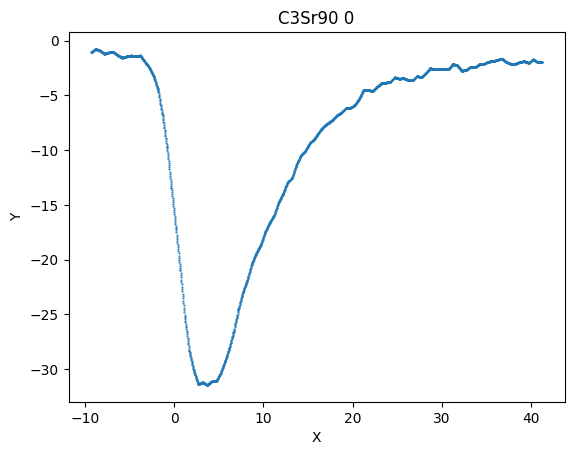

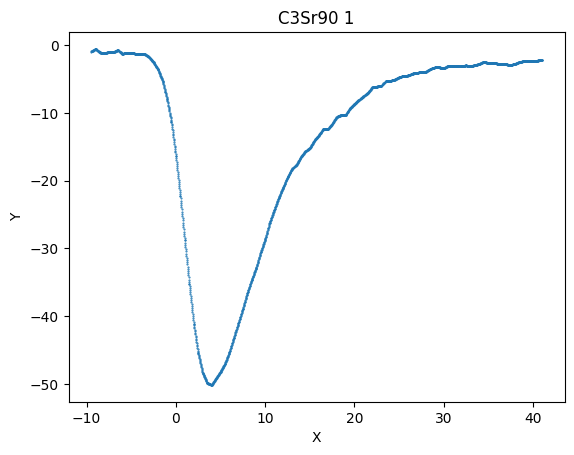

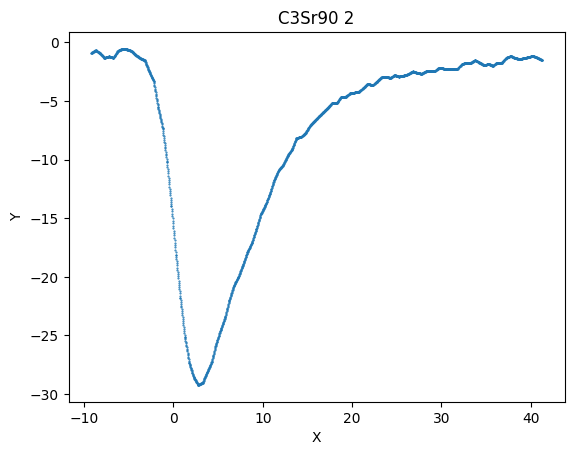

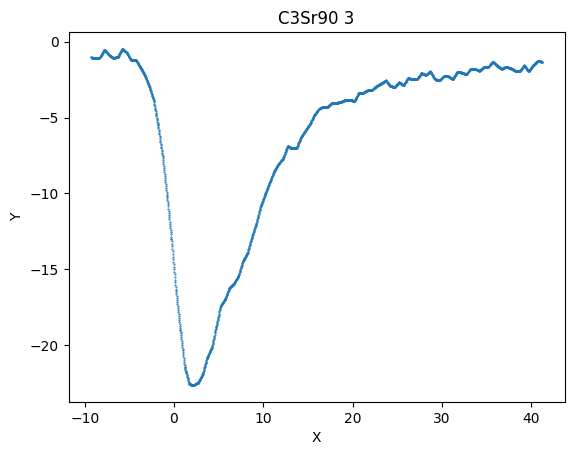

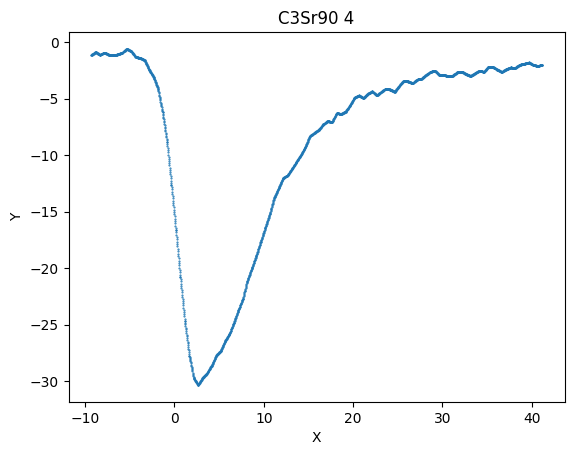

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    plt.show()

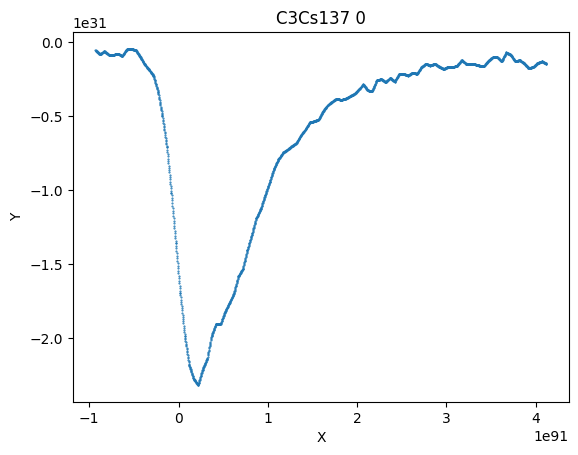

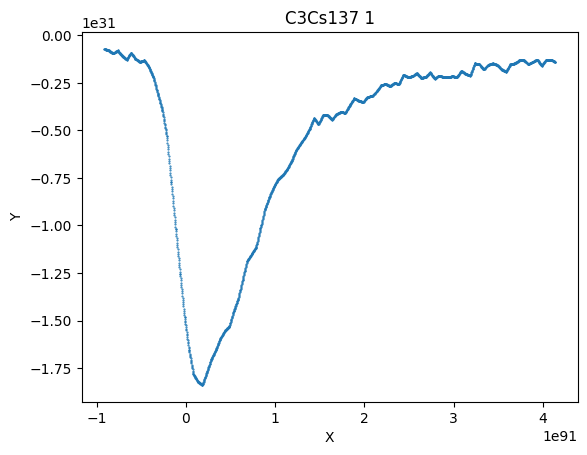

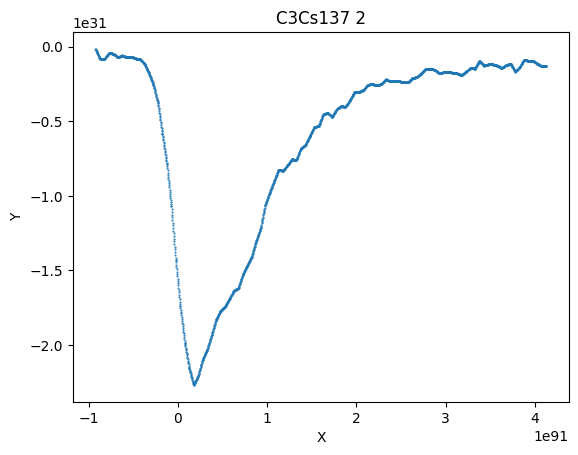

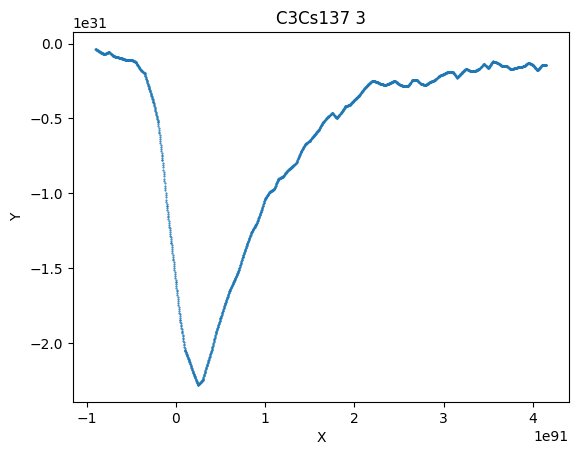

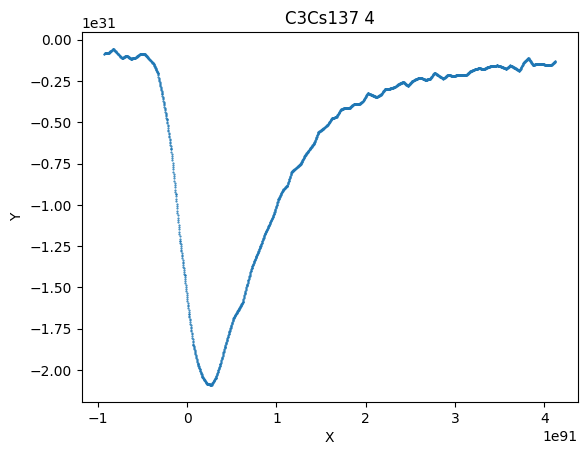

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Cs137_x[i], C3Cs137_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Cs137 ' + str(i + start_num))
    plt.show()

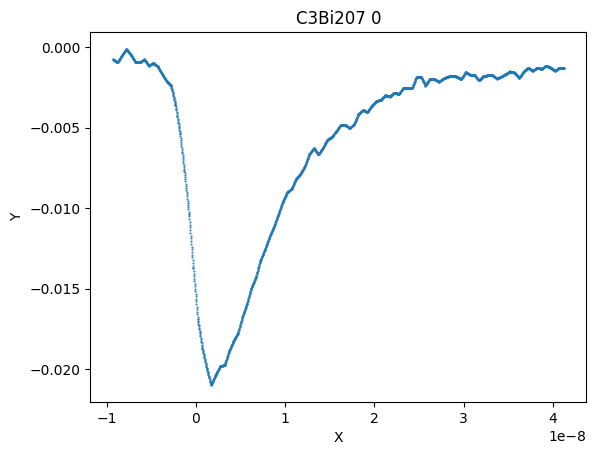

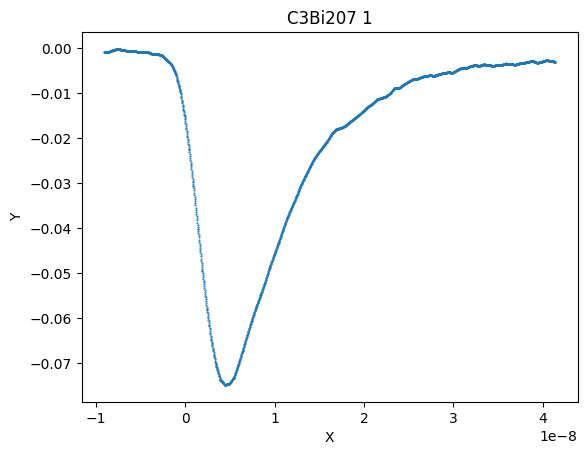

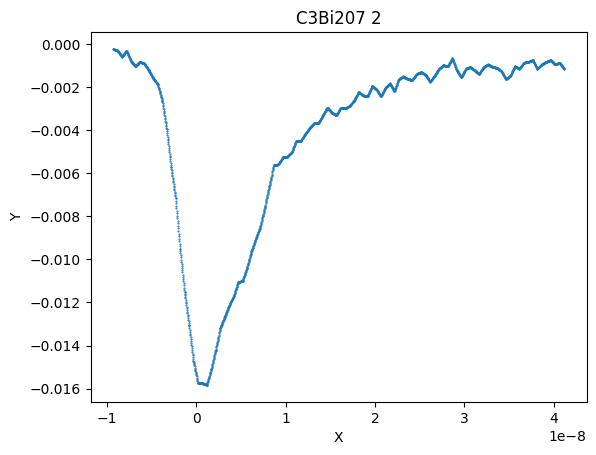

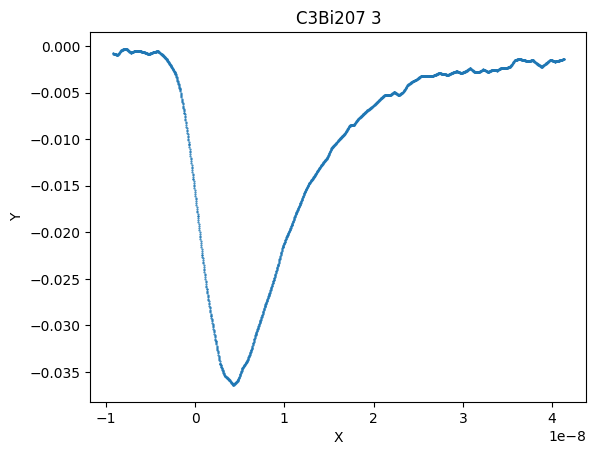

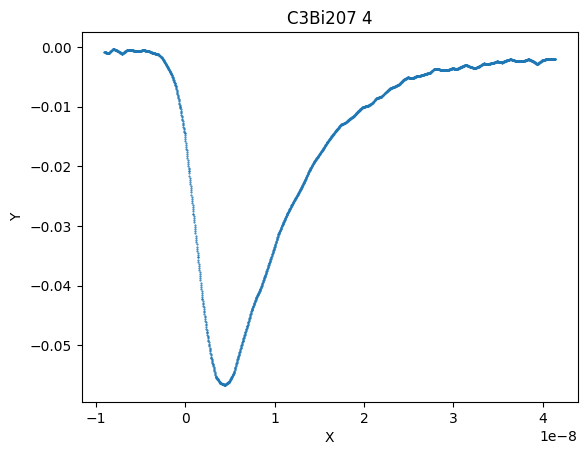

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Bi207_x[i], C3Bi207_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Bi207 ' + str(i + start_num))
    plt.show()

### 2. Peak and Peak Area Ratio

left_ratio  0.28049
peak_height  -31.4617


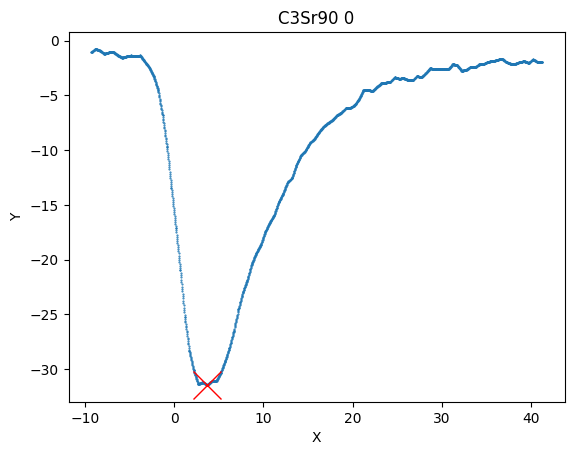

left_ratio  0.2689
peak_height  -50.1334


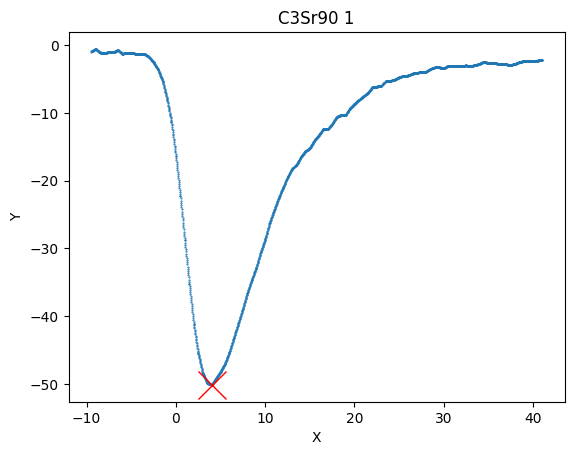

left_ratio  0.24755
peak_height  -29.2227


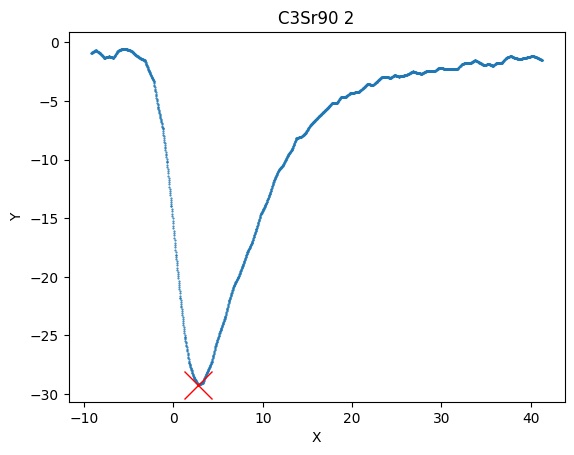

left_ratio  0.23463
peak_height  -22.6257


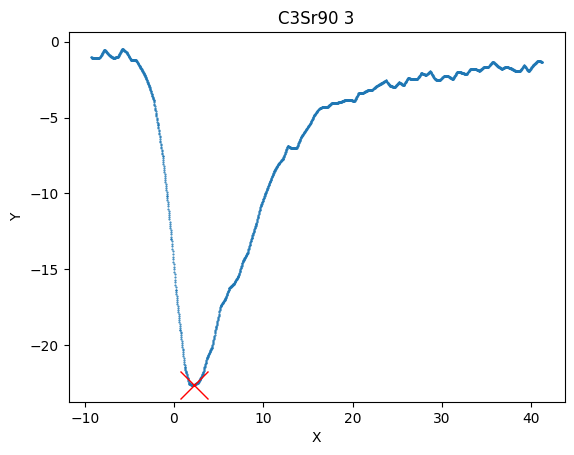

left_ratio  0.21216
peak_height  -30.3422


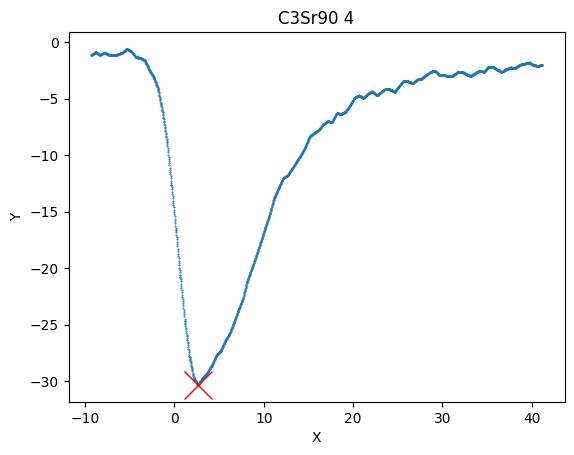

left_ratio  [0.28049 0.2689  0.24755 0.23463 0.21216]
peak_height  [-31.4617 -50.1334 -29.2227 -22.6257 -30.3422]


In [ ]:
# Initialize an empty list to store the left areas
left_ratio_list = []
peak_height_list = []

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]
    
    # Find the minimum y and the corresponding x
    min_y = neg_peak_y
    min_x = neg_peak_x

    # Find the indices of the elements in x that are to the left and right of the peak
    left_indices = C3Sr90_x[i] < min_x
    right_indices = C3Sr90_x[i] > min_x

    # Calculate the areas of the scatter plot to the left and right of the peak using the trapezoidal rule
    left_area = np.trapz(C3Sr90_y[i][left_indices], C3Sr90_x[i][left_indices])
    right_area = np.trapz(C3Sr90_y[i][right_indices], C3Sr90_x[i][right_indices])

    # Calculate the ratio of the left area to the total area and round to 5 decimal places
    left_ratio = round(left_area / (left_area + right_area), 5)

    # Append the left area and peak height to the lists
    left_ratio_list.append(left_ratio)
    peak_height_list.append(min_y)
    
    print('left_ratio ', left_ratio)
    print('peak_height ', min_y)

    # Add a peak marker at the minimum y and highlight it
    plt.plot(min_x, min_y, 'rx', markersize=20, linewidth=100)
    plt.show()

    

# Convert the lists to numpy arrays
left_ratio_array = np.array(left_ratio_list)
peak_height_array = np.array(peak_height_list)

# Print the arrays
print('left_ratio ', left_ratio_array)
print('peak_height ', peak_height_array)

    

###3. Find the X% point from the peak

###3.3. 10%~90%

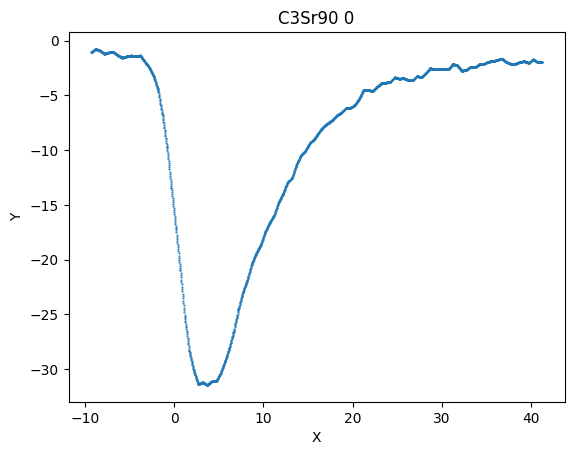

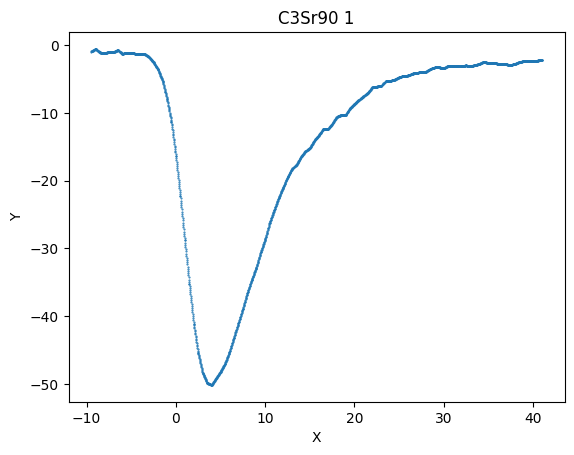

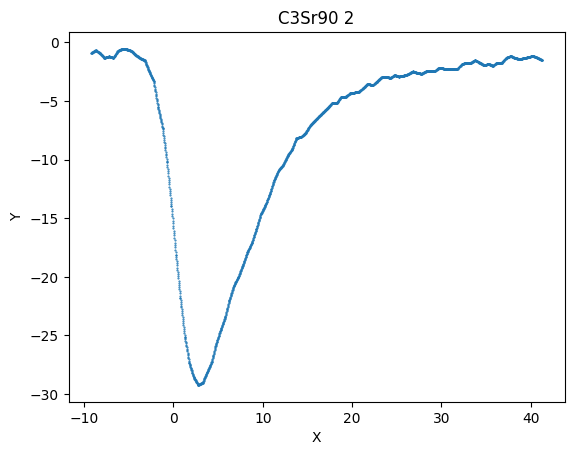

slope_10percent_left_list, [-4.9731646233506, -7.549530816016215, -4.604273093539427]
slope_10percent_right_list, [-7.4778873380564015, -10.854986040565883, -6.470658028262066]
slope_20percent_left_list, [-8.195079220641876, -12.348165942876234, -7.272313182059543]
slope_20percent_right_list, [-7.757319921239076, -12.890395434704741, -7.882340167257973]
slope_30percent_left_list, [-7.492956865546222, -12.846765938722653, -7.960451220505856]
slope_30percent_right_list, [-7.355338526164914, -12.015645065208934, -7.287032839673619]
slope_40percent_left_list, [-6.650437968115612, -10.513250041853382, -5.96948132812934]
slope_40percent_right_list, [-5.2384568704966705, -7.654972814492161, -4.011144987939714]
slope_50percent_left_list, [-2.557542658750647, -4.503524200238712, -3.0968293001503286]
slope_50percent_right_list, [2.648890200102618, 3.90558828264157, 2.812588270521431]
slope_60percent_left_list, [3.6685913559030787, 4.321233906169446, 2.56794715216302]
slope_60percent_right_list, 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_files = 3
start_num = 0

# slope_left_lists = [[] for i in range(9)]
# slope_right_lists = [[] for i in range(9)]

# for i in range(1, 10):
#     slope_left_lists[i-1] = f'slope_{i}0percent_left_list'
#     slope_right_lists[i-1] = f'slope_{i}0percent_right_list'

slope_10percent_left_list = []
slope_20percent_left_list = []
slope_30percent_left_list = []
slope_40percent_left_list = []
slope_50percent_left_list = []
slope_60percent_left_list = []
slope_70percent_left_list = []
slope_80percent_left_list = []
slope_90percent_left_list = []

slope_10percent_right_list = []
slope_20percent_right_list = []
slope_30percent_right_list = []
slope_40percent_right_list = []
slope_50percent_right_list = []
slope_60percent_right_list = []
slope_70percent_right_list = []
slope_80percent_right_list = []
slope_90percent_right_list = []

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
  
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]

    percentage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    for percent in percentage_values:
        max_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * percent
        max_indices = np.where(C3Sr90_y[i] >= max_y)[0]
        left_indices = max_indices[max_indices < np.argmin(C3Sr90_y[i])]
        right_indices = max_indices[max_indices > np.argmin(C3Sr90_y[i])]
        x1 = C3Sr90_x[i][left_indices[-1]]
        x2 = C3Sr90_x[i][right_indices[0]]
        
        var_name = f"max_{percent*100:.0f}percent"
        globals()[var_name + "_y"] = max_y
        globals()[var_name + "_x1"] = x1
        globals()[var_name + "_x2"] = x2
        globals()[var_name + "_indices"] = max_indices

    # # Mark negative peak with red circle
    plt.plot(neg_peak_x, neg_peak_y, 'x', markersize=5, color='red')
    plt.plot(max_10percent_x1, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_10percent_x2, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x1, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x2, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x1, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x2, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x1, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x2, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x1, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x2, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x1, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x2, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x1, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x2, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x1, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x2, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x1, max_90percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x2, max_90percent_y, 'o', markersize=5, color='blue')

    #--------------------------------------------------------------------------------------------

    # Define a window size for selecting nearby points
    window_size = 21

    ###10%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_10percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]
    slope_10percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_10percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]
    slope_10percent_right_list.append(slope_right)


    ###20%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_20percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]
    slope_20percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_20percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]
    slope_20percent_right_list.append(slope_right)

    ###30%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_30percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]
    slope_30percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_30percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]
    slope_30percent_right_list.append(slope_right)

    ###40%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_40percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]
    slope_40percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_40percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]
    slope_40percent_right_list.append(slope_right)

    ###50%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_50percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]
    slope_50percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_50percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]
    slope_50percent_right_list.append(slope_right)

    ###60%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_60percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]
    slope_60percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_60percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]
    slope_60percent_right_list.append(slope_right)

    ###70%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_70percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]
    slope_70percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_70percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]
    slope_70percent_right_list.append(slope_right)

    ###80%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_80percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]
    slope_80percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_80percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]
    slope_80percent_right_list.append(slope_right)

    ###90%
    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_90percent_x1)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_left = coeffs[0]
    slope_90percent_left_list.append(slope_left)

    # Find the index of the target point
    target_index = np.where(C3Sr90_x[i] == max_90percent_x2)[0][0]

    # Select the subset of data points around the target point
    start_index = max(0, target_index - window_size)
    end_index = min(len(C3Sr90_x[i]), target_index + window_size)
    x_subset = C3Sr90_x[i][start_index:end_index]
    y_subset = C3Sr90_y[i][start_index:end_index]

    # Fit a linear regression model to the subset of data points
    coeffs = np.polyfit(x_subset, y_subset, 1)

    # The slope of the regression line is the gradient at the target point
    slope_right = coeffs[0]
    slope_90percent_right_list.append(slope_right)
    
    # Show plot
    plt.show()


slope_lists = [slope_10percent_left_list, slope_20percent_left_list, slope_30percent_left_list, 
               slope_40percent_left_list, slope_50percent_left_list, slope_60percent_left_list, 
               slope_70percent_left_list, slope_80percent_left_list, slope_90percent_left_list, 
               slope_10percent_right_list, slope_20percent_right_list, slope_30percent_right_list,
               slope_40percent_right_list, slope_50percent_right_list, slope_60percent_right_list, 
               slope_70percent_right_list, slope_80percent_right_list, slope_90percent_right_list]

for i in range(0, len(slope_lists), 2):
    print(f'slope_{(i//2 + 1)*10}percent_left_list, {slope_lists[i]}')
    print(f'slope_{(i//2 + 1)*10}percent_right_list, {slope_lists[i+1]}')


target_point(x), : -2.3657
slope: -2.3508320322061507
target_point(x), : -1.4157
slope: -4.673085994163592
target_point(x), : -0.8657170000000001
slope: -6.007456690477811
target_point(x), : -0.41572000000000003
slope: -6.851234734735405
target_point(x), : 0.009279999999999993
slope: -7.389001213018446
target_point(x), : 0.43428
slope: -7.522162997223578
target_point(x), : 0.809284
slope: -7.164843154646184
target_point(x), : 1.1842989999999998
slope: -6.514210378418784
target_point(x), : 1.6843000000000001
slope: -5.127052675769254
target_point(x), : 27.984
slope: 0.42265282494116857
target_point(x), : 19.108999999999998
slope: 0.5279778648202735
target_point(x), : 15.159
slope: 1.10417979586041
target_point(x), : 13.184
slope: 1.6749283697276491
target_point(x), : 11.309000000000001
slope: 1.813813809492045
target_point(x), : 9.5843
slope: 1.987083317493806
target_point(x), : 8.1593
slope: 2.644917845866734
target_point(x), : 7.0593
slope: 3.1080801690999955
target_point(x), : 6.1093

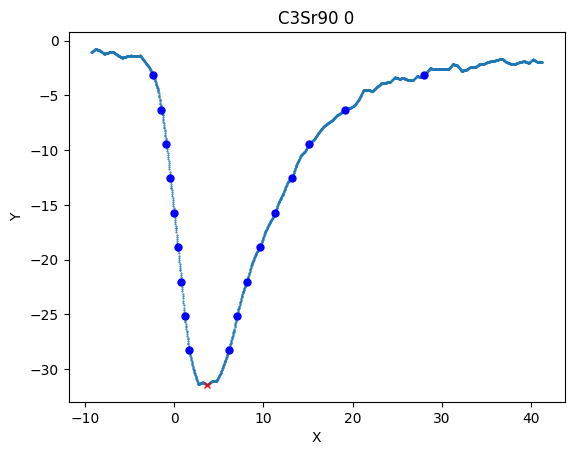

slope_10percent_left_list, [-2.3508320322061507]
slope_20percent_left_list, [-4.673085994163592]
slope_30percent_left_list, [-6.007456690477811]
slope_40percent_left_list, [-6.851234734735405]
slope_50percent_left_list, [-7.389001213018446]
slope_60percent_left_list, [-7.522162997223578]
slope_70percent_left_list, [-7.164843154646184]
slope_80percent_left_list, [-6.514210378418784]
slope_90percent_left_list, [-5.127052675769254]
slope_10percent_right_list, [0.42265282494116857]
slope_20percent_right_list, [0.5279778648202735]
slope_30percent_right_list, [1.10417979586041]
slope_40percent_right_list, [1.6749283697276491]
slope_50percent_right_list, [1.813813809492045]
slope_60percent_right_list, [1.987083317493806]
slope_70percent_right_list, [2.644917845866734]
slope_80percent_right_list, [3.1080801690999955]
slope_90percent_right_list, [2.725211214440628]


In [53]:
import numpy as np
import matplotlib.pyplot as plt

num_files = 1
start_num = 0

# Left lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_left_list"] = []
    
# Right lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_right_list"] = []

slope_lists = [slope_10percent_left_list, slope_20percent_left_list, slope_30percent_left_list, 
               slope_40percent_left_list, slope_50percent_left_list, slope_60percent_left_list, 
               slope_70percent_left_list, slope_80percent_left_list, slope_90percent_left_list, 

               slope_10percent_right_list, slope_20percent_right_list, slope_30percent_right_list,
               slope_40percent_right_list, slope_50percent_right_list, slope_60percent_right_list, 
               slope_70percent_right_list, slope_80percent_right_list, slope_90percent_right_list]

#-------------------------------------------------------------------------------------------------------------------------------------------

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
  
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]

    percentage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    for percent in percentage_values:
        # max_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * percent
        max_y = neg_peak_y * percent
        max_indices = np.where(C3Sr90_y[i] >= max_y)[0]
        left_indices = max_indices[max_indices < np.argmin(C3Sr90_y[i])]
        right_indices = max_indices[max_indices > np.argmin(C3Sr90_y[i])]
        x1 = C3Sr90_x[i][np.max(left_indices)]
        x2 = C3Sr90_x[i][np.min(right_indices)]
        
        var_name = f"max_{percent*100:.0f}percent"
        globals()[var_name + "_y"] = max_y
        globals()[var_name + "_x1"] = x1
        globals()[var_name + "_x2"] = x2
        globals()[var_name + "_indices"] = max_indices

    # # Mark negative peak with red circle
    plt.plot(neg_peak_x, neg_peak_y, 'x', markersize=5, color='red')
    plt.plot(max_10percent_x1, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_10percent_x2, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x1, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x2, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x1, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x2, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x1, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x2, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x1, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x2, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x1, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x2, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x1, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x2, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x1, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x2, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x1, max_90percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x2, max_90percent_y, 'o', markersize=5, color='blue')

    #--------------------------------------------------------------------------------------------------------------------------------

    # Define a window size for selecting nearby points
    window_size = 61


    target_points = [max_10percent_x1, max_20percent_x1, max_30percent_x1,
                    max_40percent_x1, max_50percent_x1, max_60percent_x1,
                    max_70percent_x1, max_80percent_x1, max_90percent_x1,
                     
                    max_10percent_x2, max_20percent_x2, max_30percent_x2,
                    max_40percent_x2, max_50percent_x2, max_60percent_x2,
                    max_70percent_x2, max_80percent_x2, max_90percent_x2] 
                     

    for target_point in target_points:
        print('target_point(x), :', target_point)
        # Find the index of the target point
        target_index = np.where(C3Sr90_x[i] == target_point)[0][0]

        # Select the subset of data points around the target point
        start_index = max(0, target_index - window_size)
        end_index = min(len(C3Sr90_x[i]), target_index + window_size)
        x_subset = C3Sr90_x[i][start_index:end_index]
        y_subset = C3Sr90_y[i][start_index:end_index]

        # Fit a linear regression model to the subset of data points
        coeffs = np.polyfit(x_subset, y_subset, 1)

        # The slope of the regression line is the gradient at the target point
        slope = coeffs[0]
        
        # Store the slope in the corresponding slope list
        slope_list_index = target_points.index(target_point)
        slope_lists[slope_list_index].append(slope)
        print('slope:', slope)

    
    # Show plot
    plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------------

for i in range(0, len(slope_lists)):
    if i < 9:
      print(f'slope_{(i+1)*10}percent_left_list, {slope_lists[i]}')
    else:  
      print(f'slope_{(i+1-9)*10}percent_right_list, {slope_lists[i]}')

In [57]:
import numpy as np
import matplotlib.pyplot as plt

num_files = 1000
start_num = 0

# Left lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_left_list"] = []
    
# Right lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_right_list"] = []

slope_lists = [slope_10percent_left_list, slope_20percent_left_list, slope_30percent_left_list, 
               slope_40percent_left_list, slope_50percent_left_list, slope_60percent_left_list, 
               slope_70percent_left_list, slope_80percent_left_list, slope_90percent_left_list, 

               slope_10percent_right_list, slope_20percent_right_list, slope_30percent_right_list,
               slope_40percent_right_list, slope_50percent_right_list, slope_60percent_right_list, 
               slope_70percent_right_list, slope_80percent_right_list, slope_90percent_right_list]

#-------------------------------------------------------------------------------------------------------------------------------------------

for i in range(num_files):
  
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]

    percentage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    for percent in percentage_values:
        # max_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * percent
        max_y = neg_peak_y * percent
        max_indices = np.where(C3Sr90_y[i] >= max_y)[0]
        left_indices = max_indices[max_indices < np.argmin(C3Sr90_y[i])]
        right_indices = max_indices[max_indices > np.argmin(C3Sr90_y[i])]
        x1 = C3Sr90_x[i][np.max(left_indices)]
        x2 = C3Sr90_x[i][np.min(right_indices)]
        
        var_name = f"max_{percent*100:.0f}percent"
        globals()[var_name + "_y"] = max_y
        globals()[var_name + "_x1"] = x1
        globals()[var_name + "_x2"] = x2
        globals()[var_name + "_indices"] = max_indices

    #--------------------------------------------------------------------------------------------------------------------------------

    # Define a window size for selecting nearby points
    window_size = 61


    target_points = [max_10percent_x1, max_20percent_x1, max_30percent_x1,
                    max_40percent_x1, max_50percent_x1, max_60percent_x1,
                    max_70percent_x1, max_80percent_x1, max_90percent_x1,
                     
                    max_10percent_x2, max_20percent_x2, max_30percent_x2,
                    max_40percent_x2, max_50percent_x2, max_60percent_x2,
                    max_70percent_x2, max_80percent_x2, max_90percent_x2] 
                     

    for target_point in target_points:
        #print('target_point(x), :', target_point)
        # Find the index of the target point
        target_index = np.where(C3Sr90_x[i] == target_point)[0][0]

        # Select the subset of data points around the target point
        start_index = max(0, target_index - window_size)
        end_index = min(len(C3Sr90_x[i]), target_index + window_size)
        x_subset = C3Sr90_x[i][start_index:end_index]
        y_subset = C3Sr90_y[i][start_index:end_index]

        # Fit a linear regression model to the subset of data points
        coeffs = np.polyfit(x_subset, y_subset, 1)

        # The slope of the regression line is the gradient at the target point
        slope = coeffs[0]
        
        # Store the slope in the corresponding slope list
        slope_list_index = target_points.index(target_point)
        slope_lists[slope_list_index].append(slope)
        #print('slope:', slope)

    
    # Show plot
    plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------------

for i in range(0, len(slope_lists)):
    if i < 9:
      print(f'slope_{(i+1)*10}percent_left_list, {slope_lists[i]}')
    else:  
      print(f'slope_{(i+1-9)*10}percent_right_list, {slope_lists[i]}')

slope_10percent_left_list, [-2.3508320322061507, -4.250355662728364, -2.4625477049451474, -1.3787936005825951, -2.1585220464971986, -7.244575370753763, -5.592700777391049, -4.005290589929557, -1.9137639910348758, -17.73171477589035, -1.5920040613612902, -1.7199329002989232, -2.090701796084164, -5.407008263427085, -1.6194263168310878, -2.6390746926538795, -1.8670471557680044, -2.138543385880305, -2.713476290974117, -3.0461691520973257, -5.7379998906316745, -1.5211862044826034, -5.333212205886291, -4.0423737725240105, -5.428356335090582, -4.758935256608404, -3.488181028227581, -5.218514101507151, -2.7059939193209113, -5.174365293251091, -0.9258757786381671, -1.3862599578547437, -2.318047820135551, -4.112868073680482, -0.8834883683172478, -1.7260805518078484, -6.70008919745924, -1.0720702574869865, -1.5227046386124625, -1.807583350160756, -7.815255492861423, -4.693305525567708, -1.8190581757473012, -1.537931106330866, -3.1784898590719033, -1.6601905725271302, -3.5175697905114673, -1.55569